In [1]:
# 訓練資料集Google 2012-2016的股價。1258筆
# 測試資料集Google 2017的股價。20筆
# 下載訓練資料集
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
# 下載訓練資料集
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Test.csv

--2024-10-30 06:24:37--  https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv [following]
--2024-10-30 06:24:37--  https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63488 (62K) [text/plain]
Saving to: ‘Google_Stock_Price_Train.csv’

Google_Stock_Price_ 100%[===================>]  62.00K  --.-KB/s    in 0.01s   

2024-10-30 06:24:37 (4.76 MB/s) - ‘Google_Stock_Price_Train.csv’ saved [63488/63488]

--

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 讀取訓練資料集
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

training_set = dataset_train.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# 準備訓練數據
X_train = []
y_train = []

# 使用前 120 天的資料來預測第 i 天的股票指數
for i in range(120, 1258):  # 2516 是訓練集的總數
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])

# 轉換成 NumPy 陣列格式，以便後續輸入到 RNN 模型
X_train, y_train = np.array(X_train), np.array(y_train)

# 調整 X_train 的形狀以符合 RNN 的輸入格式
# 最後一維度設定為 1，因為每次只使用一個特徵（股票指數）
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [4]:
# 印出 X_train 的形狀，確認數據的維度
print("X_train shape:", X_train.shape)

# 印出 X_train 的第一個樣本數據
print("First sample in X_train:")
print(X_train[0])

X_train shape: (1138, 120, 1)
First sample in X_train:
[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]
 [0.08627874]
 [0.08471612]
 [0.07454052]
 [0.07883771]
 [0.07238262]
 [0.06663442]
 [0.06315574]
 [0.067

In [5]:
# 匯入 Keras 相關的庫和包
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# 建立一個序列模型
regressor = Sequential()

# 第一層 LSTM，包含 100 個單位，返回序列以便於後續 LSTM 層的使用
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# 添加 Dropout 層以防止過擬合，設置丟棄率為 30%
regressor.add(Dropout(0.3))

# 第二層 LSTM，包含 100 個單位，繼續返回序列
regressor.add(LSTM(units=100, return_sequences=True))
# 添加 Dropout 層
regressor.add(Dropout(0.3))

# 第三層 LSTM，包含 100 個單位，繼續返回序列
regressor.add(LSTM(units=100, return_sequences=True))
# 添加 Dropout 層
regressor.add(Dropout(0.3))

# 第四層 LSTM，包含 100 個單位，這一層不再返回序列
regressor.add(LSTM(units=100))
# 添加 Dropout 層
regressor.add(Dropout(0.3))

# 添加輸出層，預測單一數值（股價）
regressor.add(Dense(units=1))

# 編譯模型，使用 Adam 優化器和均方誤差作為損失函數
regressor.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# 進行訓練
# X_train: 輸入特徵，包含過去 120 天的股價數據
# y_train: 對應的預測值，包含下一天的股價數據
# epochs: 訓練的迭代次數，這裡設置為 130
# batch_size: 每次訓練使用的樣本數量，這裡設置為 1024
regressor.fit(X_train, y_train, epochs=130, batch_size=1024)


Epoch 1/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.2987
Epoch 2/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0309 
Epoch 3/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0332 
Epoch 4/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0440 
Epoch 5/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0716 
Epoch 6/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0548 
Epoch 7/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0217 
Epoch 8/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0171 
Epoch 9/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0362 
Epoch 10/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0190 
Epoch 11/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0125 
Epoch 12/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0190 
Epoch 13/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0207 
Epoch 14/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0155 
Epoch 15/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0095 
Epoch

In [8]:
# 讀取2017股票測試資料集
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

# 抓出OPEN股票指數欄位值
real_stock_price = dataset_test.iloc[:, 1:2].values

# 抓出2017年前120天的資料
# 將訓練集與測試集的開盤價合併，為預測提供完整的上下文
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# 取出最後120天的資料，準備進行預測
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values  # 包括測試集之前的120天
inputs = inputs.reshape(-1, 1)  # 重塑形狀以符合Scaler的要求
inputs = sc.transform(inputs)  # 特徵縮放

# 準備X_test數據集
X_test = []
# timesteps設定為120，這意味著我們需要前120天的數據來預測接下來的股價
for i in range(120, 120 + len(dataset_test)):  # 使用len(dataset_test)獲取正確的範圍
    X_test.append(inputs[i-120:i, 0])  # 將前60天的數據添加到X_test中

# 將X_test轉換為NumPy陣列
X_test = np.array(X_test)

# 輸出X_test的形狀，以檢查其正確性
print(f"X_test shape before reshaping: {X_test.shape}")

# 確保X_test不是空的
if X_test.size == 0:
    print("X_test is empty. Please check the data preparation steps.")
else:
    # 重塑為三維陣列，以符合LSTM的輸入需求
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # 應為 (num_samples, 60, 1)

# 預測股票指數
predicted_stock_price = regressor.predict(X_test)  # 使用訓練好的模型進行預測

# 把預測結果從0~1之間還原為原來的股票指數
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # 將預測的股價恢復到原始範圍

X_test shape before reshaping: (20, 120)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


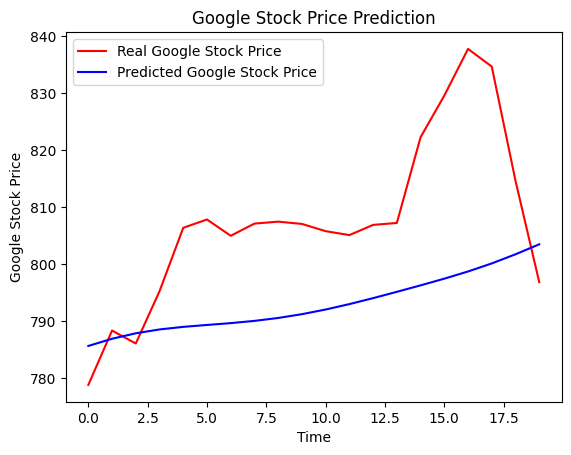

In [9]:
# 引入繪圖庫
import matplotlib.pyplot as plt  # 用於繪製圖形

# 繪製真實股價
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')  # 用紅色線表示真實的股價數據

# 繪製預測股價
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')  # 用藍色線表示預測的股價數據

# 設置圖表標題
plt.title('Google Stock Price Prediction')  # 圖表的標題

# 設置X軸標籤
plt.xlabel('Time')  # X軸表示時間（可以是天數或數據點索引）

# 設置Y軸標籤
plt.ylabel('Google Stock Price')  # Y軸表示Google股價

# 添加圖例
plt.legend()  # 顯示圖例以區分真實股價和預測股價

# 顯示圖形
plt.show()  # 顯示最終的圖表
